# Universidad del Valle de Guatemala
## Security Data Science
### Juan Pablo Pineda Melendez 19087

In [10]:
import pandas as pd
import re
import sweetviz as sv
from math import log2
from collections import Counter



## 1. Cargar el dataset en pandas y mostrar 5 observaciones

In [2]:
df = pd.read_csv("dataset_pishing.csv")
df.sample(5)

,url,status
5364,https://en.wikipedia.org/wiki/Numerical_control,legitimate
9781,https://www.ftitc.com/project,phishing
5781,https://cpccivils-my.sharepoint.com/:b:/g/pers...,phishing
6134,https://www.proteca.jp/,legitimate
681,http://stefaninicompany.net/webadmin/login.php...,phishing


## 2. Mostrar la cantidad de observaciones

In [3]:
status_counts = df['status'].value_counts()
status_counts

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

### El dataset esta balanceado

### 1. ¿Qué ventajas tiene el análisis de una URL contra el análisis de otros datos, cómo el tiempode vida del dominio, o las características de la página Web?
Que las URLS al ser estructuras de texto estandar, pueden ser analizadas y procesadas de manera eficiente, ademas de que las URLs contienen informacion directa sobre la ubicacion y la identidad del sitio web por lo que se pueden conseguir pistas importantes sobre su autenticidad.
### 2. ¿Qué características de una URL son más prometedoras para la detección de phishing?
- La longitud del dominio
- Cantidad de numeros en el dominio
- uso HTTPS
- Cantidad de guiones en la URL 
- Cantidad de numeros en la URL
- Cantidad de caracteres especiales
- Cantidad de subdominios.
- Uso de caracteres aleatorios.

In [4]:
# Definir funciones para calcular cada característica
def longitud_dominio(url):
    return len(url)

def cantidad_numeros_dominio(url):
    return sum(c.isdigit() for c in url)

def uso_https(url):
    return 1 if url.startswith('https') else 0

def cantidad_guiones(url):
    return url.count('-')

def cantidad_numeros_url(url):
    return sum(c.isdigit() for c in url)

def cantidad_caracteres_especiales(url):
    return len(re.findall('[^A-Za-z0-9]', url))

def cantidad_subdominios(url):
    return url.count('.')

def uso_caracteres_aleatorios(url):
    return 1 if re.search(r'\b[a-zA-Z0-9]{10,}\b', url) else 0


In [5]:
# Aplicar las funciones al dataset
df['longitud_dominio'] = df['url'].apply(longitud_dominio)
df['cantidad_numeros_dominio'] = df['url'].apply(cantidad_numeros_dominio)
df['uso_https'] = df['url'].apply(uso_https)
df['cantidad_guiones'] = df['url'].apply(cantidad_guiones)
df['cantidad_numeros_url'] = df['url'].apply(cantidad_numeros_url)
df['cantidad_caracteres_especiales'] = df['url'].apply(cantidad_caracteres_especiales)
df['cantidad_subdominios'] = df['url'].apply(cantidad_subdominios)
df['uso_caracteres_aleatorios'] = df['url'].apply(uso_caracteres_aleatorios)


In [6]:
df.to_csv("dataset_pishing_enriched.csv", index=False)

In [7]:
# Cargar el dataset enriquecido
df = pd.read_csv("dataset_pishing_enriched.csv")

# Convertir la variable 'status' a binaria
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

# Eliminar la columna 'url'
df.drop('url', axis=1, inplace=True)

# Generar el reporte de perfil con Sweetviz
report = sv.analyze(df)

# Almacenar el reporte como una página HTML
report.show_html("phishing_urls_analysis.html")

Feature: status                              |█         | [ 10%]   00:00 -> (00:00 left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report phishing_urls_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


No se poseen observaciones repetidas.

In [13]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y 'status' es la variable objetivo
X = df.drop('status', axis=1)  # Características
y = df['status']  # Variable objetivo

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc

# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test)

# Calcular métricas
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo de Árboles de Decisión
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred_dec_tree = dec_tree.predict(X_test)

# Calcular métricas
conf_matrix_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)
precision_dec_tree = precision_score(y_test, y_pred_dec_tree)
recall_dec_tree = recall_score(y_test, y_pred_dec_tree)
fpr_dec_tree, tpr_dec_tree, _ = roc_curve(y_test, dec_tree.predict_proba(X_test)[:,1])
auc_dec_tree = auc(fpr_dec_tree, tpr_dec_tree)

In [17]:
from sklearn.metrics import precision_score, recall_score

# Asumiendo que ya tienes las predicciones y las verdaderas etiquetas en y_test y y_pred
precisionlg = precision_score(y_test, y_pred_log_reg)
precisiondt = precision_score(y_test, y_pred_dec_tree)
recalllg = recall_score(y_test, y_pred_log_reg)
recalldt = recall_score(y_test, y_pred_dec_tree)

print(f"Precision log reg: {precisionlg}")
print(f"Precision dec tree: {precisiondt}")
print(f"Recall log reg: {recalllg}")
print(f"Recall dec tree: {recalldt}")

Precision log reg: 0.7371244635193133
Precision dec tree: 0.7685714285714286
Recall log reg: 0.608503100088574
Recall dec tree: 0.7147918511957484


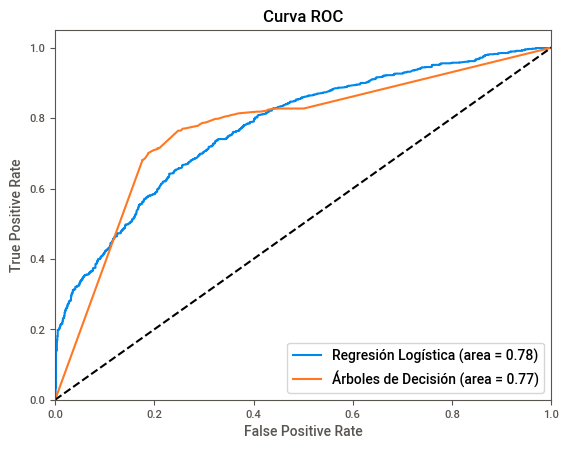

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, label='Regresión Logística (area = %0.2f)' % auc_log_reg)
plt.plot(fpr_dec_tree, tpr_dec_tree, label='Árboles de Decisión (area = %0.2f)' % auc_dec_tree)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

3. **Impacto de clasificar un sitio legítimo como phishing (Falso Positivo)**: Clasificar erróneamente un sitio legítimo como phishing puede llevar a la pérdida de acceso para los usuarios, dañar la reputación del sitio y causar pérdidas económicas al propietario del sitio. La precisión de los modelos nos indica qué tan bien están evitando estos falsos positivos. Con una precisión del 73.71% para la regresión logística y del 76.86% para los árboles de decisión, los árboles de decisión son ligeramente mejores en minimizar los falsos positivos.

4. **Impacto de clasificar un sitio de phishing como legítimo (Falso Negativo)**: No detectar un sitio de phishing puede tener consecuencias graves, como el robo de información sensible y pérdidas financieras. El recall nos indica qué tan bien está el modelo detectando los casos de phishing. Con un recall del 60.85% para la regresión logística y del 71.48% para los árboles de decisión, los árboles de decisión son considerablemente mejores en identificar sitios de phishing correctamente.


5. **Métrica para comparar modelos similares de clasificación de phishing**: Dado que los falsos negativos son más críticos en este contexto, el recall es una métrica importante. Sin embargo, no queremos sacrificar demasiada precisión. El modelo de árboles de decisión tiene un mejor equilibrio entre precisión y recall, lo que sugiere que podría ser más adecuado para este problema específico.

6. **Modelo con mejor rendimiento**: Los árboles de decisión tienen un mejor rendimiento en términos de recall (71.48% vs. 60.85%) y precisión (76.86% vs. 73.71%) en comparación con la regresión logística. A pesar de que la regresión logística tiene un AUC ligeramente más alto en la curva ROC, los árboles de decisión parecen ser más efectivos para este caso de uso específico debido a su mayor capacidad para identificar correctamente los sitios de phishing y minimizar los falsos positivos.


7. **Evaluación del modelo en un entorno empresarial**:
   - **Cantidad de alarmas generadas**: Con 7,500 emails de phishing (15% de 50,000), y un recall del 71.48% para los árboles de decisión, el modelo detectaría aproximadamente 5,361 emails de phishing correctamente (verdaderos positivos).
   - **Alarmas Positivas Verdaderas y Falsas**: Con una precisión del 76.86%, de las alarmas que el modelo genera, aproximadamente el 23.14% serían falsos positivos. Si el modelo genera 5,361 alarmas verdaderas, el número total de alarmas (verdaderas positivas + falsas positivas) sería alrededor de 6,980, lo que significa que habría aproximadamente 1,619 falsos positivos (6,980 - 5,361).
   - **Funcionamiento del modelo para el BR propuesto**: El modelo de árboles de decisión parece funcionar bien para el BR propuesto, pero aún hay margen de mejora, especialmente en la reducción de falsos positivos.
   - **Reducir la cantidad de falsas alarmas**: Para reducir los falsos positivos, se podrían tomar medidas como ajustar el umbral de clasificación, realizar un balanceo de clases más efectivo, añadir más características relevantes, aplicar técnicas de selección de características, o probar modelos más complejos o técnicas de ensamblaje.
